# Week 1 - Tasks

- **Data Source:** `yfinance`
- **Assets:** `AAPL`, `MSFT`, `GOOG`, `AMZN`, `TSLA` (and `NVDA` for Task 5)
- **Timeframes:**
  * **Long Term:** `start="2015-01-01", end="2024-01-01"`
  * **Medium Term:** `start="2020-01-01", end="2024-01-01"` (Includes COVID crash)

The goal for this week is to gain familiarity with financial data, analyze common trends, learn standard library functions, and touch upon the underlying theory.

## Task 1 - Setup
* Fetch **Long Term** historical data for the 5 assets.
* Extract the `Adjusted Close` values.
    * *Note: Check for missing values or empty rows and handle them (drop or fill).*
* Use `df.describe()` to extract key summary statistics.
* Extract the **Medium Term** data as well for later tasks.

In [1]:
import yfinance as yf
import pandas as pd

# Assets
assets = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "NVDA"]

# Timeframes
long_start, long_end = "2015-01-01", "2024-01-01"
med_start, med_end   = "2020-01-01", "2024-01-01"

# Fetch Long Term Historical Data
data_long = yf.download(
    assets,
    start=long_start,
    end=long_end,
    auto_adjust=False
)

# Extract Adjusted Close
adj_close_long = data_long["Adj Close"]

# Handle missing values
adj_close_long = adj_close_long.ffill().bfill()

# Summary statistics
summary_stats = adj_close_long.describe()

# Fetching Medium Term Data for further analysis
data_med = yf.download(
    assets,
    start=med_start,
    end=med_end,
    auto_adjust=False
)

adj_close_med = data_med["Adj Close"].ffill().bfill()

# Display outputs
print("Long Term Summary Statistics:")
print(summary_stats)

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed

Long Term Summary Statistics:
Ticker         AAPL         AMZN         GOOG         MSFT         NVDA  \
count   2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean      81.394710    91.950540    73.063479   154.516907    11.101311   
std       55.990880    48.654536    36.298158    99.658478    11.961935   
min       20.604080    14.347500    24.377237    34.437157     0.459257   
25%       32.814692    44.303625    41.515250    59.182492     2.668014   
50%       51.220840    90.691998    59.376663   127.528831     5.962060   
75%      139.017643   133.230000   104.133976   244.037388    15.909115   
max      196.256577   186.570496   149.587082   377.077850    50.376503   

Ticker         TSLA  
count   2264.000000  
mean     102.886245  
std      110.936400  
min        9.578000  
25%       16.670500  
50%       23.160666  
75%      214.290005  
max      409.970001  


## Task 2 - Basic Trends
* Select **one asset** and using the **Medium Term** data, compute:
    * **Returns:** 1-day, 5-day, and 20-day simple returns.
    * **Log Returns:** 1-day, 5-day, and 20-day log returns.
    * **Volatility:** 5-day, 20-day, and 60-day rolling standard deviation (volatility) of the log returns.
* **Plotting:**
    * Plot the price and the 20-day moving average on one chart.
    * Plot the 1-day log returns on a separate chart.
    * Plot the rolling volatilities on a third chart.
    * *Analysis:* What trends do you observe? Does high volatility correlate with price drops?

* **Bonus (Long Term Data):**
    * Create a scatter plot of `|Daily Return|` vs `Volume`. Is there a relationship?
    * Group returns and volatility by **Month** (e.g., all Januaries, all Februaries) and plot the averages. Is there a "seasonal" effect?

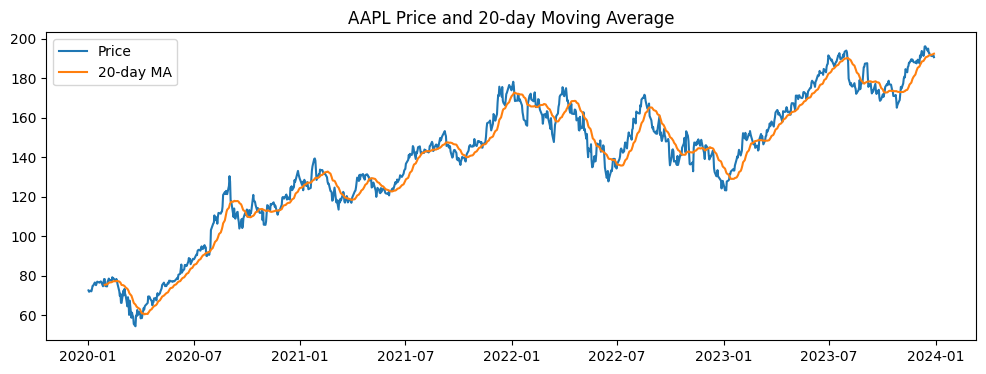

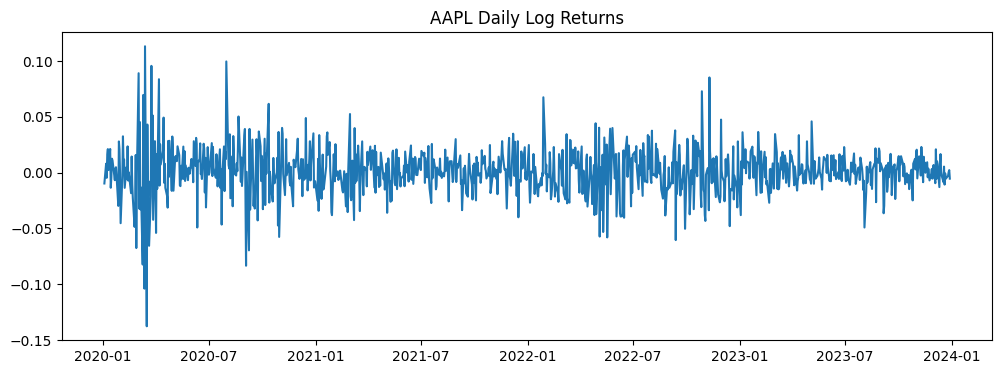

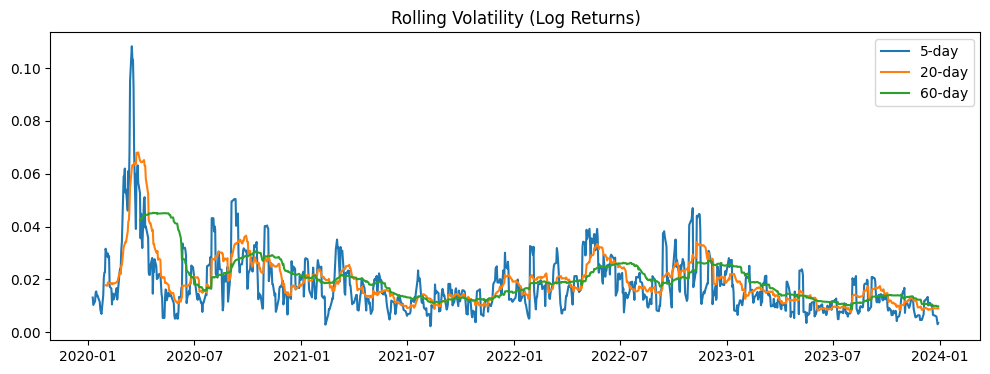

In [2]:
import numpy as np
import matplotlib.pyplot as plt

asset = "AAPL"
price = adj_close_med[asset]

# simple returns
ret_1 = price.pct_change()
ret_5 = price.pct_change(5)
ret_20 = price.pct_change(20)

# log returns
logret_1 = np.log(price).diff()
logret_5 = np.log(price).diff(5)
logret_20 = np.log(price).diff(20)

# rolling volatility (using daily log returns)
vol_5 = logret_1.rolling(5).std()
vol_20 = logret_1.rolling(20).std()
vol_60 = logret_1.rolling(60).std()

# price + moving average
plt.figure(figsize=(12,4))
plt.plot(price, label="Price")
plt.plot(price.rolling(20).mean(), label="20-day MA")
plt.title("AAPL Price and 20-day Moving Average")
plt.legend()
plt.show()

# daily log returns
plt.figure(figsize=(12,4))
plt.plot(logret_1)
plt.title("AAPL Daily Log Returns")
plt.show()

# rolling volatility
plt.figure(figsize=(12,4))
plt.plot(vol_5, label="5-day")
plt.plot(vol_20, label="20-day")
plt.plot(vol_60, label="60-day")
plt.title("Rolling Volatility (Log Returns)")
plt.legend()
plt.show()

### Analysis:

1. The 20-day moving average smooths short-term noise and moves according to the medium term overall trend.

2. Daily log returns fluctuate around zero and do not show a clear trend.

3. Volatility shows clear clustering rather than remaining constant over time. The sharpest spike appears in early 2020, corresponding to the COVID market crash.

4. The 5-day volatility reacts quickly to shocks and is very noisy and the 20-day measure captures more sustained risk. The 60-day volatility is smoother and reflects long term.

5. Periods of high volatility align with the market being down, confirming that volatility tends to increase during price drops.

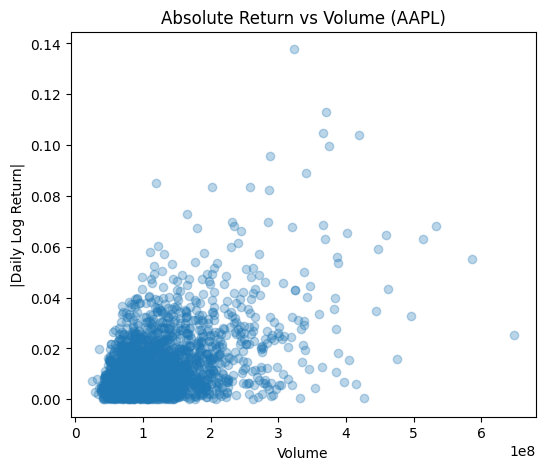

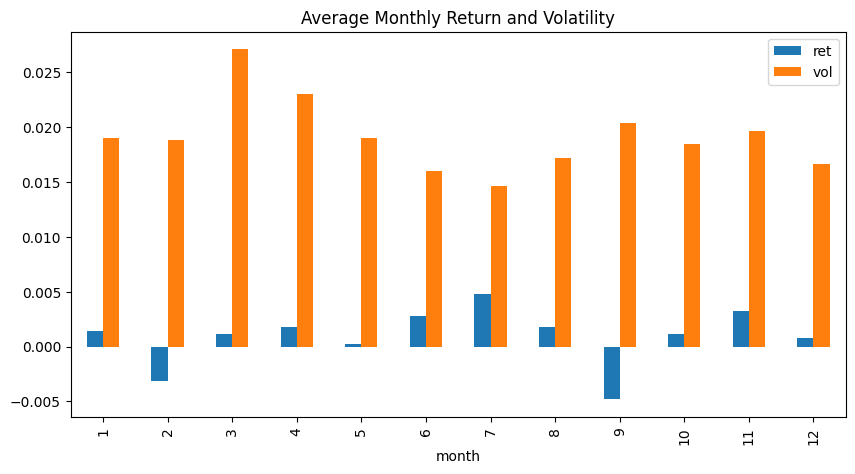

In [3]:
# Bonus Task 

# |daily return| vs volume
abs_ret = np.abs(np.log(adj_close_long[asset]).diff())
volm = data_long["Volume"][asset]

plt.figure(figsize=(6,5))
plt.scatter(volm, abs_ret, alpha=0.3)
plt.xlabel("Volume")
plt.ylabel("|Daily Log Return|")
plt.title("Absolute Return vs Volume (AAPL)")
plt.show()

# monthly averages
monthly = np.log(adj_close_med[asset]).diff().to_frame("ret")
monthly["vol"] = monthly["ret"].rolling(20).std()
monthly["month"] = monthly.index.month

monthly.groupby("month").mean().plot(kind="bar", figsize=(10,5))
plt.title("Average Monthly Return and Volatility")
plt.show()

**Absolute Return vs Volume Observations**

- Majority of the days have small price movements and average trading volume.
- Large absolute returns are rare but usually occur on high-volume days.
- Higher volume often has bigger price swings.
- High volume does not always mean a big move but big moves usually have high volume.
- The relationship is not very strong.

**Monthly Seasonality Observations**

- No common pattern and have both positive or negative returns.
- Months with higher volatility do not always correspond to higher returns.
- There doesn't seem to be any seasonality here.

## Task 3 - Stationarity
* Select **one asset** (Long Term).
* Compute the **Rolling Mean** and **Rolling Standard Deviation** of log returns with window sizes `20, 60, 120`.
* Plot them and visually inspect.
    * Does the mean stay constant? (Stationary mean)
    * Does the variance stay constant? (Stationary variance)
* Run an **Augmented Dickey-Fuller (ADF) Test** on the log return series.
    * Library: `from statsmodels.tsa.stattools import adfuller`
    * *Goal:* Interpret the p-value. The Null Hypothesis ($H_0$) is that the series is non-stationary (has a unit root). If p-value < 0.05, we reject $H_0$.
    * For learning about hypothesis testing and p-value you can refer to CS215 slides or other standard resources mentioned in READMEs.

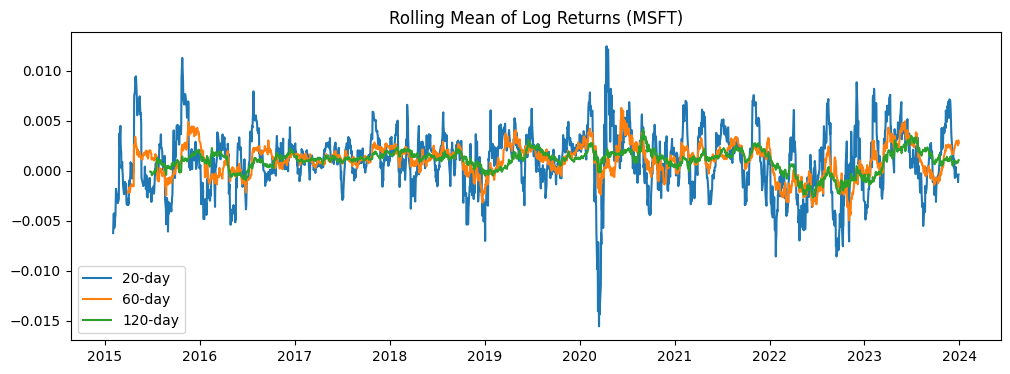

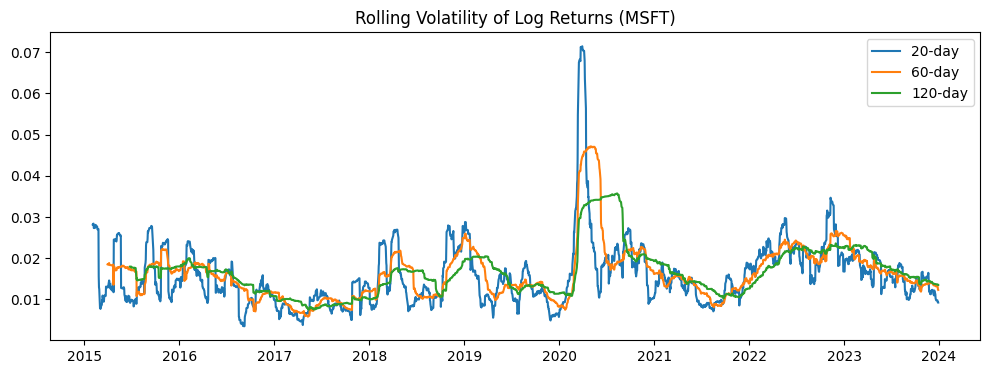

ADF Statistic: -16.50435585091865
p-value: 2.1342353962127755e-29


In [4]:
from statsmodels.tsa.stattools import adfuller

asset = "MSFT"
price = adj_close_long[asset]

# log returns
logret = np.log(price).diff().dropna()

# rolling mean
rm20 = logret.rolling(20).mean()
rm60 = logret.rolling(60).mean()
rm120 = logret.rolling(120).mean()

# rolling std
rs20 = logret.rolling(20).std()
rs60 = logret.rolling(60).std()
rs120 = logret.rolling(120).std()

plt.figure(figsize=(12,4))
plt.plot(rm20, label="20-day")
plt.plot(rm60, label="60-day")
plt.plot(rm120, label="120-day")
plt.title("Rolling Mean of Log Returns (MSFT)")
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(rs20, label="20-day")
plt.plot(rs60, label="60-day")
plt.plot(rs120, label="120-day")
plt.title("Rolling Volatility of Log Returns (MSFT)")
plt.legend()
plt.show()

adf = adfuller(logret)
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])

#### Mean: Nearly Constant 
- The rolling mean of log returns stays close to zero for all window sizes. There is no sustained upward or downward drift, the mean can be considered stationary.
#### Variance: Not constant
- The variance does not remain constant over time, there are strong spikes in volatility (especially in covid)
- Periods of high volatility are followed by high volatility showing clustering.
- Shorter windows (20-day) react faster and more noisy.
- Longer windows (60-day, 120-day) are smoother and shwo lag in sudden changes.
#### p value analysis
- Since the p-value is far below 0.05 the null hypothesis is rejected, indicating that the log returns are stationary.

## Task 4 - Volatility Regimes
We try to study the trend in volatility more deeply. From the ACF/PACF plot we know that volatility tends to cluster that is the market is either in a high volatility state (greater daily fluctuations) or low volatility state (stable prices, quiet markets).

Formally we can treat volatility as a *conditional standard deviation of returns*, conditioned on the history observed so far. We *cannot* predict *true* volatility for a given day based on the single return value, hence we try to estimate it using the past information. For this we look at two indicators of volatility:

1.  **Rolling Window Volatility:** Simple Moving Average (SMA) of standard deviation.
2.  **EWMA Volatility:** Exponentially Weighted Moving Average. This gives more weight to recent events. It is given by $\sigma_t^2 = (1-\lambda)r_t^2 + \lambda \sigma_{t-1}^2$.

**Steps:**
* Pick an asset and use data covering the **Feb-Mar 2020 COVID crash**.
* Compute two volatility estimates on the Log Returns:
    1.  **Rolling 20-day Volatility:** Standard deviation over a 20-day window.
    2.  **EWMA Volatility (RiskMetrics):** Use a decay factor $\lambda = 0.94$.
        * *Hint:* In pandas `df.ewm()`, the parameter `alpha` corresponds to $1 - \lambda$. So, use `alpha=0.06`.
* **Analysis:**
    * Plot both estimates on the same chart.
    * Which is smoother?
    * Which estimator reacts faster to the sudden crash in March 2020?
    * Which one would you prefer for risk management?
* **Regime Detection:** Compute the 60th percentile of your EWMA volatility series. Shade the regions on the plot where volatility exceeds this level.

* **Bonus:** A good volatility model "standardizes" the returns well. Calculate $z_t = r_t / \hat{\sigma}_t$. If the model is good, $z_t$ should have $Var \approx 1$. Check the variance of $z_t$ and plot its histogram.

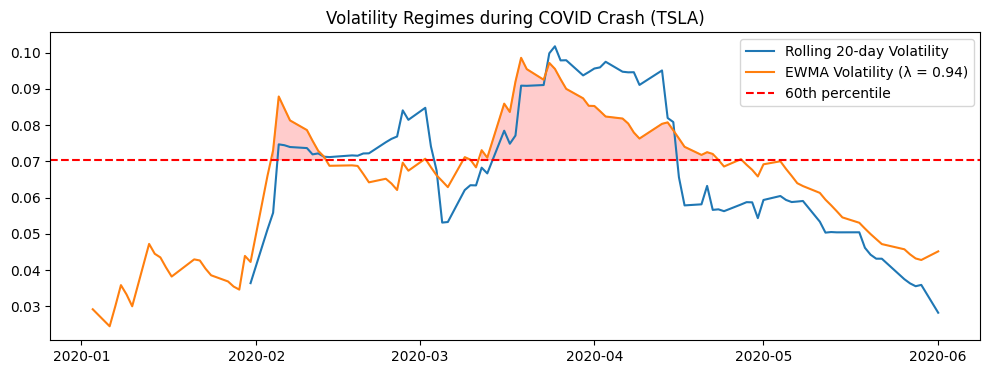

In [5]:
asset = "TSLA"

# focus on COVID crash period
price = adj_close_long[asset]["2020-01-01":"2020-06-01"]

# log returns
logret = np.log(price).diff().dropna()

# 1) Rolling 20-day volatility
roll_vol_20 = logret.rolling(20).std()

# 2) EWMA volatility (RiskMetrics, lambda = 0.94)
ewma_var = (logret**2).ewm(alpha=0.06).mean()
ewma_vol = np.sqrt(ewma_var)

# 60th percentile threshold
threshold = ewma_vol.quantile(0.60)

# plot both volatilities
plt.figure(figsize=(12,4))
plt.plot(roll_vol_20, label="Rolling 20-day Volatility")
plt.plot(ewma_vol, label="EWMA Volatility (λ = 0.94)")
plt.axhline(threshold, color="red", linestyle="--", label="60th percentile")

# shade high volatility regimes
plt.fill_between(
    ewma_vol.index,
    ewma_vol,
    threshold,
    where=(ewma_vol > threshold),
    color="red",
    alpha=0.2
)

plt.title("Volatility Regimes during COVID Crash (TSLA)")
plt.legend()
plt.show()

# I have not attempted the bonus part

**Volatility Regimes – Observations (TSLA)**

- Both rolling and EWMA volatility rise sharply during the COVID crash period.
- EWMA volatility is smoother and reacts faster to sudden spikes compared to the rolling 20-day estimate.
- The rolling volatility shows more abrupt jumps due to equal weighting within the window.
- Periods where EWMA volatility exceeds the 60th percentile correspond to high-volatility regimes.
- EWMA volatility is better suited for risk management because it adapts more quickly to changing conditions.

## Task 5 - Time Horizons and the "Normal" Illusion
Short-term markets are noisy and dangerous (fat tails), while long-term data looks smoother. We can prove this statistically using **Skew** and **Kurtosis**.

**Theory:**
* **Skewness:** Measures asymmetry. (Negative skew = frequent small gains, few extreme losses).
* **Kurtosis:** Measures "tailedness". (High kurtosis = frequent extreme events/crashes).
* **Normal Distribution:** Skew $\approx 0$, Kurtosis $\approx 3$ (or Excess Kurtosis $\approx 0$).

**Steps:**
1.  Take your **Long Term** data for one asset (e.g., NVDA or TSLA).
2.  Resample the prices to get **Weekly** and **Monthly** closes.
    * Use `df['Adj Close'].resample('W').last()` and `...resample('M').last()`.
3.  Compute Log Returns for all three series: Daily, Weekly, Monthly.
4.  **The Test:**
    * Calculate **Skew** and **Kurtosis** for each of the three return series.
    * *Question:* How do these values change as the time horizon increases? Do they get closer to 0 and 3?
5.  **Visualization:**
    * Plot the **Histograms** of the Daily returns vs. Monthly returns on the same plot.
    * *Tip:* You will need to standardize them (subtract mean, divide by std dev) to overlay them meaningfully.
    * *Observation:* Look at the tails. Which one has "fatter" tails (more extreme outliers)?

**Key Takeaway:**
Daily returns often violate the "Normal Distribution" assumption used in many financial models. Long-term returns fit it better. This is called *Aggregational Gaussianity*.

**Bonus:** This is a direct application of a simple yet well-known result in asymptotic statistics. Can you find out what it is and state how it explains this observation?

Daily -> Skew: 0.210, Kurtosis: 10.513
Weekly -> Skew: 0.102, Kurtosis: 4.364
Monthly -> Skew: -0.553, Kurtosis: 3.602


C:\Users\manik\AppData\Local\Temp\ipykernel_20060\1452723109.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_m = price.resample("M").last()


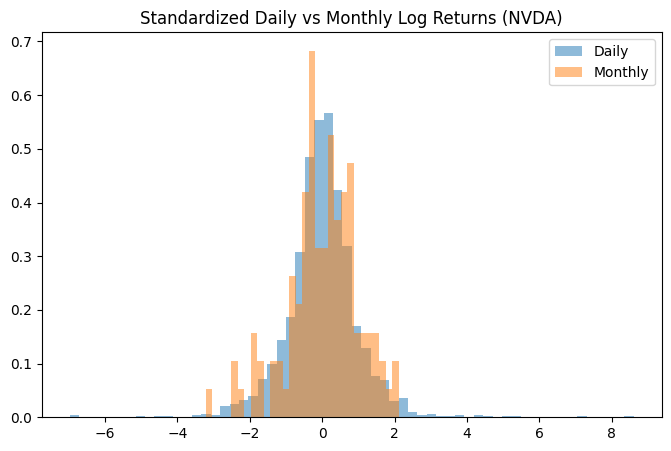

In [6]:
from scipy.stats import skew, kurtosis

asset = "NVDA"
price = adj_close_long[asset]

# daily log returns
ret_d = np.log(price).diff().dropna()

# weekly & monthly prices
price_w = price.resample("W").last()
price_m = price.resample("M").last()

# weekly & monthly log returns
ret_w = np.log(price_w).diff().dropna()
ret_m = np.log(price_m).diff().dropna()

# skewness and kurtosis
stats = {
    "Daily":   (skew(ret_d), kurtosis(ret_d, fisher=False)),
    "Weekly":  (skew(ret_w), kurtosis(ret_w, fisher=False)),
    "Monthly": (skew(ret_m), kurtosis(ret_m, fisher=False))
}

for k, v in stats.items():
    print(f"{k} -> Skew: {v[0]:.3f}, Kurtosis: {v[1]:.3f}")

# standardize returns for histogram comparison
ret_d_std = (ret_d - ret_d.mean()) / ret_d.std()
ret_m_std = (ret_m - ret_m.mean()) / ret_m.std()

# histogram comparison
plt.figure(figsize=(8,5))
plt.hist(ret_d_std, bins=60, density=True, alpha=0.5, label="Daily")
plt.hist(ret_m_std, bins=30, density=True, alpha=0.5, label="Monthly")
plt.title("Standardized Daily vs Monthly Log Returns (NVDA)")
plt.legend()
plt.show()

**Skewness and Kurtosis Across Time Horizons**
#### Kurtosis
Daily returns show high kurtosis (~10.5), indicating very fat tails and frequent extreme events. Weekly returns have lower kurtosis (~4.4), showing that extreme movements reduce as returns are aggregated. Monthly returns have kurtosis (~3.6) much closer to the normal distribution value of 3.
#### Skewness
Skewness also moves closer to zero as the time horizon increases, monthly returns show slight negative skew. Overall, as we move from daily to monthly returns the distribution becomes more normal.
#### Graph Analysis
The daily returns have much fatter tails than the monthly returns with more extreme positive and negative outliers. Monthly returns are more concentrated around the mean, indicating fewer extreme events at longer time horizons.

## Task 6 - Smart investing
Calculate how many **RTX 4090s** (approx. price $1,600$) you could afford *today* if you had invested **$1,000** in NVIDIA on the day you were born.

In [7]:
import yfinance as yf

birth_date = "2006-01-17"
investment = 1000
gpu_price = 1600

nvda = yf.download("NVDA", start=birth_date, auto_adjust=True, progress=False)

# safely get nearest available trading day
price_then = nvda.loc[nvda.index.asof(birth_date), "Close"]

price_now = yf.download(
    "NVDA", period="1d", auto_adjust=True, progress=False
)["Close"].iloc[-1]

shares = investment / price_then
current_value = shares * price_now
rtx_4090s = current_value / gpu_price
rtx_4090s = int(rtx_4090s)

print ("Number of RTX 4090 GPUs Affordable:", rtx_4090s)

Number of RTX 4090 GPUs Affordable: 363


C:\Users\manik\AppData\Local\Temp\ipykernel_20060\3706845492.py:19: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  rtx_4090s = int(rtx_4090s)
